In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

## SST

In [2]:
input_folder = "../../Data/History/China_sea_surface_temperature/"
output_folder = "../../Data/History/ECS_phy_his/"

os.makedirs(output_folder, exist_ok=True)

new_lon = np.linspace(117.34, 131.02, num=29)
new_lat = np.linspace(23.17, 32.80, num=21)

file_list = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith('.nc')]

ECS_SST_his = []
for file_path in file_list:
    try:
        ds = xr.open_dataset(file_path)
        
        if 'longitude' not in ds or 'latitude' not in ds:
            print(f"Skipping file (no lon/lat): {file_path}")
            continue
        
        ds_ECS = ds.interp(longitude=new_lon, latitude=new_lat, method="linear")
        ds_ECS = ds_ECS.expand_dims(dim={"nz": [1]})
        ds_ECS = ds_ECS.rename({'latitude': 'ny', 'longitude': 'nx', 'analysed_sst': 'T'})
        ds_ECS = ds_ECS.assign_coords(ny=("ny", list(range(len(ds_ECS.ny)))), 
                                      nx=("nx", range(len(ds_ECS.nx))),
                                      nz=("nz", [1]))
        ds_ECS = ds_ECS['T'].resample(time='1M').mean()
        ds_ECS['time'] = pd.to_datetime(ds_ECS['time'].values).strftime('%Y-%m')
        ECS_SST_his.append(ds_ECS)
   
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

ECS_SST_his = xr.concat(ECS_SST_his, dim='time').transpose('time', 'nz', 'ny', 'nx').to_dataset()

ECS_SST_his['T'] = ECS_SST_his['T'] - 273.15
ECS_SST_his['T'].attrs['units'] = 'Celsius'
ECS_SST_his['T'].attrs['long_name'] = 'T'

In [3]:
ECS_SST_his

<xarray.Dataset>
Dimensions:  (nx: 29, ny: 21, nz: 1, time: 360)
Coordinates:
  * time     (time) object '1990-01' '1990-02' '1990-03' ... '2019-11' '2019-12'
  * nz       (nz) int32 1
  * nx       (nx) int32 0 1 2 3 4 5 6 7 8 9 10 ... 19 20 21 22 23 24 25 26 27 28
  * ny       (ny) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Data variables:
    T        (time, nz, ny, nx) float64 17.37 17.58 18.01 ... nan 15.48 nan

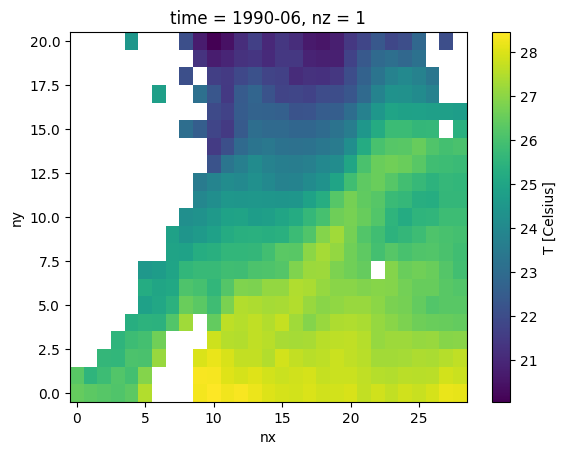

In [4]:
ECS_SST_his.T.sel(nz=1, time='1990-06').plot()

## SBT

In [5]:
input_folder = "../../Data/History/China_sea_bottom_temperature/"
output_folder = "../../Data/History/ECS_phy_his/"

os.makedirs(output_folder, exist_ok=True)

new_lon = np.linspace(117.34, 131.02, num=29)
new_lat = np.linspace(23.17, 32.80, num=21)

file_list = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith('.nc')]

ECS_SBT_his = []
for file_path in file_list:
    try:
        ds = xr.open_dataset(file_path)
        
        if 'longitude' not in ds or 'latitude' not in ds:
            print(f"Skipping file (no lon/lat): {file_path}")
            continue
        
        ds_ECS = ds.interp(longitude=new_lon, latitude=new_lat, method="linear")
        ds_ECS = ds_ECS.expand_dims(dim={"nz": [3]})
        ds_ECS = ds_ECS.rename({'latitude': 'ny', 'longitude': 'nx', 'bottomT': 'T'})
        ds_ECS = ds_ECS.assign_coords(ny=("ny", list(range(len(ds_ECS.ny)))), 
                                      nx=("nx", range(len(ds_ECS.nx))),
                                      nz=("nz", [3]))
        ds_ECS = ds_ECS['T'].resample(time='1M').mean()
        ds_ECS['time'] = pd.to_datetime(ds_ECS['time'].values).strftime('%Y-%m')
        ECS_SBT_his.append(ds_ECS)
   
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

ECS_SBT_his = xr.concat(ECS_SBT_his, dim='time').transpose('time', 'nz', 'ny', 'nx').to_dataset()

# pre_extend to 1990 
data_1993 = ECS_SBT_his.sel(time=slice("1993-01", "1993-12"))
data_1990_1992 = xr.concat([data_1993] * 3, dim="time")
new_times = pd.date_range("1990-01-01", "1992-12-31", freq="M").strftime('%Y-%m')
data_1990_1992 = data_1990_1992.assign_coords(time=("time", new_times))

ECS_SBT_his = xr.concat([data_1990_1992, ECS_SBT_his], dim="time")

ECS_SBT_his['T'].attrs['units'] = 'Celsius'
ECS_SBT_his['T'].attrs['long_name'] = 'T'

In [6]:
ECS_SBT_his

<xarray.Dataset>
Dimensions:  (nx: 29, ny: 21, nz: 1, time: 360)
Coordinates:
  * time     (time) object '1990-01' '1990-02' '1990-03' ... '2019-11' '2019-12'
  * nz       (nz) int32 3
  * nx       (nx) int32 0 1 2 3 4 5 6 7 8 9 10 ... 19 20 21 22 23 24 25 26 27 28
  * ny       (ny) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Data variables:
    T        (time, nz, ny, nx) float64 19.57 19.34 19.27 19.98 ... nan nan nan

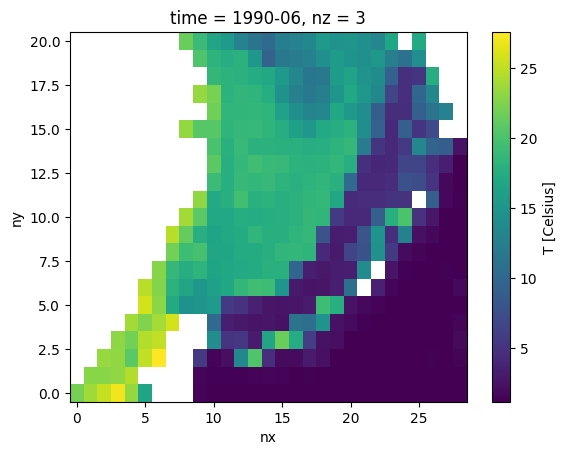

In [7]:
ECS_SBT_his.T.sel(nz=3, time='1990-06').plot()

## SDO

In [8]:
input_folder = "../../Data/History/China_sea_surface_dissolved_oxygen/"
output_folder = "../../Data/History/ECS_phy_his/"

os.makedirs(output_folder, exist_ok=True)

new_lon = np.linspace(117.34, 131.02, num=29)
new_lat = np.linspace(23.17, 32.80, num=21)

file_list = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith('.nc')]

ECS_SDO_his = []
for file_path in file_list:
    try:
        ds = xr.open_dataset(file_path)
        ds
        
        if 'longitude' not in ds or 'latitude' not in ds:
            print(f"Skipping file (no lon/lat): {file_path}")
            continue

        ds_ECS = ds.interp(longitude=new_lon, latitude=new_lat, method="linear")
        ds_ECS = ds_ECS["o2"].mean(dim="depth").to_dataset()    ##@@@@@@@@@@@@@@@@@@@@@@@@
        ds_ECS = ds_ECS.expand_dims(dim={"nz": [1]})
        ds_ECS = ds_ECS.rename({'latitude': 'ny', 'longitude': 'nx', 'o2': 'O2'})
        ds_ECS = ds_ECS.assign_coords(ny=("ny", list(range(len(ds_ECS.ny)))), 
                                      nx=("nx", range(len(ds_ECS.nx))),
                                      nz=("nz", [1]))
        ds_ECS = ds_ECS['O2'].resample(time='1M').mean()
        ds_ECS['time'] = pd.to_datetime(ds_ECS['time'].values).strftime('%Y-%m')
        ECS_SDO_his.append(ds_ECS)
   
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

ECS_SDO_his = xr.concat(ECS_SDO_his, dim='time').transpose('time', 'nz', 'ny', 'nx').to_dataset()

# pre_extend to 1990 
data_1993 = ECS_SDO_his.sel(time=slice("1993-01", "1993-12"))
data_1990_1992 = xr.concat([data_1993] * 3, dim="time")
new_times = pd.date_range("1990-01-01", "1992-12-31", freq="M").strftime('%Y-%m')
data_1990_1992 = data_1990_1992.assign_coords(time=("time", new_times))

ECS_SDO_his = xr.concat([data_1990_1992, ECS_SDO_his], dim="time")

ECS_SDO_his['O2'] = ECS_SDO_his['O2'] * 32 / 1000  ## mmol/m^3 -> mg/L
ECS_SDO_his['O2'].attrs['units'] = 'mg/L'
ECS_SDO_his['O2'].attrs['long_name'] = 'O2'

In [9]:
ECS_SDO_his

<xarray.Dataset>
Dimensions:  (nx: 29, ny: 21, nz: 1, time: 360)
Coordinates:
  * time     (time) object '1990-01' '1990-02' '1990-03' ... '2019-11' '2019-12'
  * nz       (nz) int32 1
  * nx       (nx) int32 0 1 2 3 4 5 6 7 8 9 10 ... 19 20 21 22 23 24 25 26 27 28
  * ny       (ny) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Data variables:
    O2       (time, nz, ny, nx) float64 7.927 7.873 7.825 7.39 ... nan nan nan

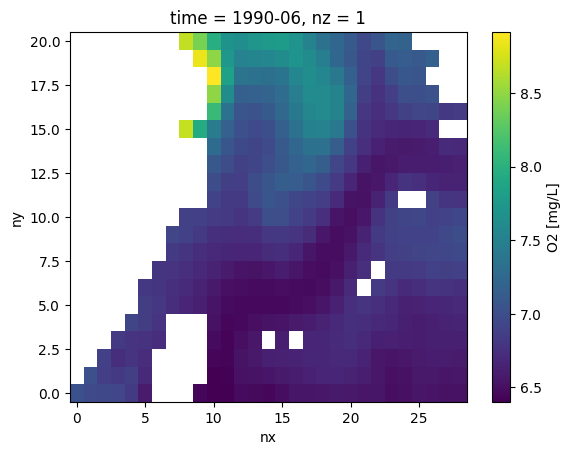

In [10]:
ECS_SDO_his.O2.sel(nz=1, time='1990-06').plot()

## BDO

In [11]:
## https://www.generic-mapping-tools.org/remote-datasets/earth-relief.html
ds = xr.open_dataset('../../Data/History/China_sea_bototm_dissolved_oxygen/earth_relief_06m_p.grd')

new_lon = np.linspace(117.34, 131.02, num=29)
new_lat = np.linspace(23.17, 32.80, num=21)

ds_ECS = ds.interp(lon=new_lon, lat=new_lat, method="linear")
ds_ECS = ds_ECS.expand_dims(dim={"nz": [1]})
ds_ECS = ds_ECS.rename({'lat': 'ny', 'lon': 'nx', 'z': 'depth'})
ds_ECS = ds_ECS.assign_coords(ny=("ny", list(range(len(ds_ECS.ny)))), 
                              nx=("nx", range(len(ds_ECS.nx))),
                              nz=("nz", [1]))

ds_ECS 

<xarray.Dataset>
Dimensions:  (nx: 29, ny: 21, nz: 1)
Coordinates:
  * nz       (nz) int32 1
  * nx       (nx) int32 0 1 2 3 4 5 6 7 8 9 10 ... 19 20 21 22 23 24 25 26 27 28
  * ny       (ny) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Data variables:
    depth    (nz, ny, nx) float64 -36.57 -24.22 -21.35 ... 48.86 9.961 643.8
Attributes:
    Conventions:  CF-1.7
    GMT_version:  6.5.0 [64-bit] [MP]
    node_offset:  1
    title:        SRTM15 Earth Relief v2.6 at 06 arc minutes
    history:      
    description:  Reduced by Gaussian Cartesian filtering (31.5 km fullwidth)...

In [12]:
o2_data = ECS_SDO_his["O2"]
ECS_depth = ds_ECS["depth"]
o2_BDO = o2_data * (0.0000005*ECS_depth**2-0.0118*ECS_depth+99.979) / 100
ECS_BDO_his = o2_BDO.to_dataset(name="O2")
ECS_BDO_his = ECS_BDO_his.assign_coords(nz=("nz", [3]))

ECS_BDO_his

<xarray.Dataset>
Dimensions:  (nx: 29, ny: 21, nz: 1, time: 360)
Coordinates:
  * time     (time) object '1990-01' '1990-02' '1990-03' ... '2019-11' '2019-12'
  * nz       (nz) int32 3
  * nx       (nx) int32 0 1 2 3 4 5 6 7 8 9 10 ... 19 20 21 22 23 24 25 26 27 28
  * ny       (ny) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Data variables:
    O2       (time, nz, ny, nx) float64 7.959 7.894 7.843 7.412 ... nan nan nan

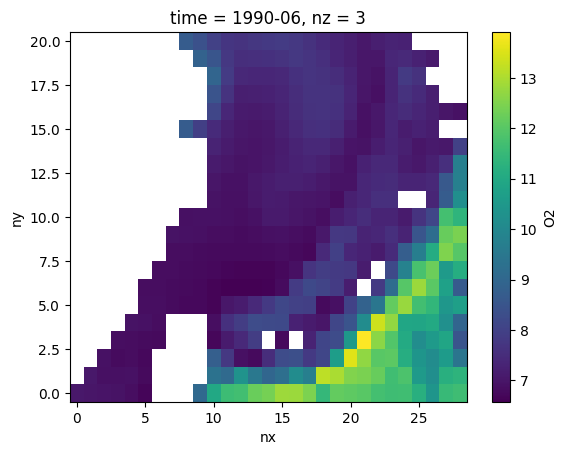

In [13]:
ECS_BDO_his.O2.sel(nz=3, time='1990-06').plot()

## ECS_Phy_His

In [14]:
ECS_Phy_1990_2019 = xr.Dataset({
    'T': xr.concat([ECS_SST_his.T, ECS_SBT_his.T], dim='nz'),
    'O2': xr.concat([ECS_SDO_his.O2, ECS_BDO_his.O2], dim='nz')
})

ECS_Phy_1990_2019

<xarray.Dataset>
Dimensions:  (nx: 29, ny: 21, nz: 2, time: 360)
Coordinates:
  * time     (time) object '1990-01' '1990-02' '1990-03' ... '2019-11' '2019-12'
  * nz       (nz) int64 1 3
  * nx       (nx) int32 0 1 2 3 4 5 6 7 8 9 10 ... 19 20 21 22 23 24 25 26 27 28
  * ny       (ny) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Data variables:
    T        (time, nz, ny, nx) float64 17.37 17.58 18.01 18.77 ... nan nan nan
    O2       (time, nz, ny, nx) float64 7.927 7.873 7.825 7.39 ... nan nan nan

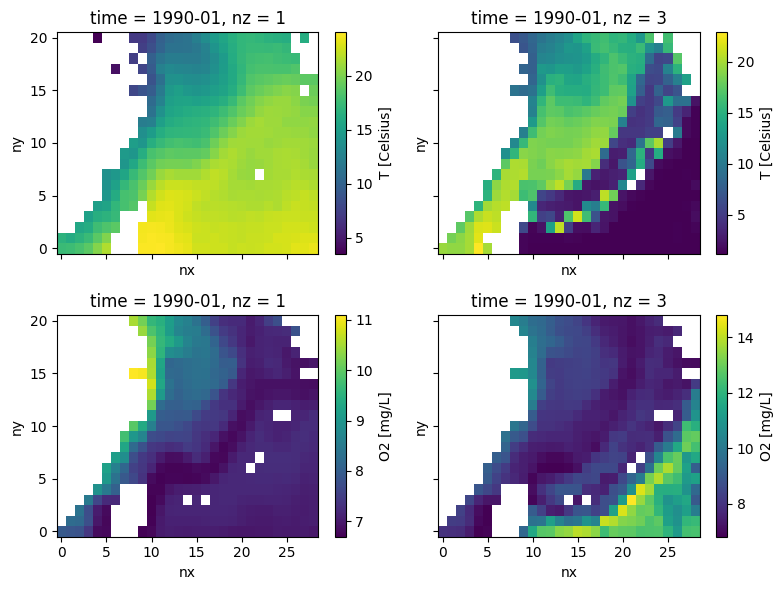

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)

for r, phy in enumerate(["T", "O2"]):
    for c, layer in enumerate([1, 3]):
        ECS_Phy_1990_2019[phy].sel(time="1990-01", nz=layer).plot(ax=ax[r, c])
        
plt.tight_layout()
plt.show()

In [16]:
ECS_Phy_1990_2019.to_netcdf("ECS_Phy_1990_2019.nc")